In [1]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [6]:
class Caltech256Dataset(Dataset):
    """Caltech 256 dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file (filepath, label).
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.imagelist = pd.read_csv(csv_file,usecols=['image','label'])
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.imagelist)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.imagelist.iloc[idx, 0]).replace('\\', '/')
        image = Image.open(img_name).convert('RGB')
        if self.transform:
            image = self.transform(image)
        label = self.imagelist.iloc[idx, 1]
        sample = {'image': image, 'label': label}
        return image, label

In [7]:
caltech256_traindataset = Caltech256Dataset(csv_file='./data/Caltech256/trainDataSet.csv',
                                            root_dir='./data/Caltech256/256_ObjectCategories',
                                            transform=transforms.Compose([
                                               transforms.Resize(256),
                                               #transforms.transforms.RandomCrop(224),
                                               #transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor()
                                            ]))

In [19]:
def computeMeanForNormalize(dataset):
    means = []
    stds = []
    for data in dataset:
        image, label = data # image [C * H * W]
        mean = torch.mean(torch.mean(image,1),1).numpy()
        std = torch.std(torch.std(image,1),1).numpy()
        means.append(mean)
        stds.append(std)
    means = np.array(means).mean(0)
    stds = np.array(stds).mean(0)
    return means

In [20]:
means = computeMeanForNormalize(caltech256_traindataset)

In [28]:
means.shape

(7710, 3)

In [30]:
def computeStdForNormalize(dataset):
    stds = []
    for data in dataset:
        image, label = data # image [C * H * W]
        std = torch.std(torch.std(image,1),1).numpy()
        stds.append(std)
    stds = np.array(stds)
    return stds

In [31]:
stds = computeStdForNormalize(caltech256_traindataset)

In [35]:
stds.

array([[0.05711783, 0.06176331, 0.062509  ],
       [0.10159919, 0.09237197, 0.09783146],
       [0.06962386, 0.06711496, 0.07457351],
       ...,
       [0.04589625, 0.06045521, 0.07087544],
       [0.02692627, 0.02728227, 0.02943572],
       [0.02737434, 0.01983638, 0.02033699]], dtype=float32)

In [36]:
a=torch.randn(2, 3, 4)
a.view(2,-1)

tensor([[-0.6236, -0.2060,  1.0271, -0.4889, -1.9552,  1.3001,  2.0672,  1.9485,
         -1.1469, -0.5483, -1.8065,  0.1485],
        [ 0.5212,  0.5958, -0.9025, -0.2785, -0.0776, -0.2465, -0.5193,  0.2788,
         -0.8247,  1.0558,  0.1113,  0.5018]])

In [50]:
b = caltech256_traindataset[0][0]
c = b.view(3,-1).mean(1).numpy()
c

array([0.6661922, 0.7079454, 0.7085566], dtype=float32)

In [51]:
d = np.ones(3)
d+c

array([1.66619217, 1.70794541, 1.70855659])

In [52]:
len(caltech256_traindataset)

7710

In [53]:
def computeBeforeNormalize(dataset):
    means = np.zeros(3)
    stds = np.zeros(3)
    nb = len(dataset)
    for data in dataset:
        image, label = data # image [C * H * W]
        image_C = image.view(3,-1)
        means += image_C.mean(1).numpy()
        stds += image_C.std(1).numpy()
    means = means/nb
    stds = stds/nb
    return means, stds

In [54]:
means, stds = computeBeforeNormalize(caltech256_traindataset)

In [55]:
means

array([0.55517198, 0.53375827, 0.50551041])

In [56]:
stds

array([0.23612623, 0.23623358, 0.23891582])

In [57]:
caltech256_testdataset = Caltech256Dataset(csv_file='./data/Caltech256/testDataSet.csv',
                                            root_dir='./data/Caltech256/256_ObjectCategories',
                                            transform=transforms.Compose([
                                               transforms.Resize(256),
                                               #transforms.transforms.RandomCrop(224),
                                               #transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor()
                                            ]))

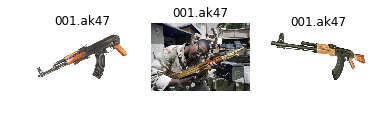

In [59]:
plt.figure()
for i in range(3):
    sample = caltech256_testdataset[i]
    #print(i,sample['image'].shape,sample['label'])
    ax = plt.subplot(1,3,i+1)
    plt.title(sample[1])
    ax.axis('off')
#     imagebatch = sample[0].unsqueeze(0)
#     grid = utils.make_grid(imagebatch)
    imagebatch = sample[0]
    grid = utils.make_grid(imagebatch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

In [60]:
tmeans, tstds = computeBeforeNormalize(caltech256_testdataset)

In [61]:
tmeans,tstds

(array([0.5517131 , 0.53087857, 0.50269934]),
 array([0.23537882, 0.23507463, 0.23890983]))

In [63]:
caltech256_traindataset[0][0]

tensor([[[0.3686, 0.3529, 0.3686,  ..., 0.5412, 0.5373, 0.5294],
         [0.3569, 0.3529, 0.3686,  ..., 0.5451, 0.5412, 0.5294],
         [0.3490, 0.3569, 0.3765,  ..., 0.5451, 0.5412, 0.5333],
         ...,
         [0.4627, 0.4667, 0.5059,  ..., 0.5176, 0.4980, 0.4824],
         [0.4431, 0.4510, 0.4980,  ..., 0.4980, 0.4902, 0.4745],
         [0.4275, 0.4392, 0.4980,  ..., 0.4784, 0.4745, 0.4667]],

        [[0.4196, 0.4039, 0.4196,  ..., 0.5961, 0.5882, 0.5804],
         [0.4078, 0.4039, 0.4196,  ..., 0.5961, 0.5922, 0.5804],
         [0.4000, 0.4078, 0.4275,  ..., 0.6039, 0.5961, 0.5882],
         ...,
         [0.5098, 0.5137, 0.5529,  ..., 0.5333, 0.5176, 0.5020],
         [0.4902, 0.4980, 0.5451,  ..., 0.5176, 0.5098, 0.4941],
         [0.4745, 0.4863, 0.5451,  ..., 0.4980, 0.4941, 0.4863]],

        [[0.4510, 0.4353, 0.4510,  ..., 0.6275, 0.6235, 0.6157],
         [0.4392, 0.4353, 0.4510,  ..., 0.6314, 0.6275, 0.6157],
         [0.4314, 0.4392, 0.4588,  ..., 0.6353, 0.6314, 0.

In [66]:
torch.mean(caltech256_traindataset[0][0])

tensor(0.6942)